In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline

In [2]:
df_covid = pd.read_csv("./input/covid_19_clear.csv", parse_dates=['Date'], infer_datetime_format=True)


In [3]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11346 entries, 0 to 11345
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    11346 non-null  object        
 1   Date       11346 non-null  datetime64[ns]
 2   Confirmed  11346 non-null  float64       
 3   Deaths     11346 non-null  float64       
 4   Recovered  11346 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 443.3+ KB


In [105]:
df_covid_italy = df_covid[df_covid['Country'] == 'United States']
df_covid_italy = df_covid_italy.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

In [40]:
df_covid_italy

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0
...,...,...,...
2020-03-19,41035.0,3405.0,4440.0
2020-03-20,47021.0,4032.0,4440.0
2020-03-21,53578.0,4825.0,6072.0


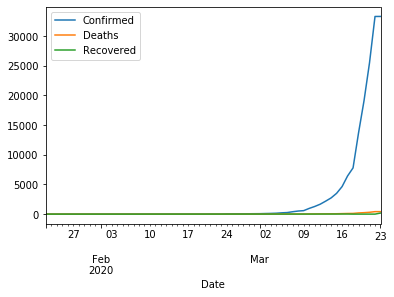

In [106]:
df_covid_italy.plot()

In [107]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [108]:
df_covid_italy['Confirmed'] = (df_covid_italy['Confirmed'] - df_covid_italy['Confirmed'].values.min()) / (df_covid_italy['Confirmed'].values.max() - df_covid_world['Confirmed'].values.min())


In [109]:
split_date = '2020-03-20'
covid_train = df_covid_italy.loc[df_covid_italy.index <= split_date].copy()
covid_valid = df_covid_italy.loc[df_covid_italy.index > split_date].copy()

In [110]:
covid_train.Confirmed.values.min()

0.0

In [111]:
X_train, y_train = create_features(covid_train, label='Confirmed')
X_valid, y_valid = create_features(covid_valid, label='Confirmed')
X_test, y_test = create_features(covid_test, label='Confirmed')

In [112]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2020-01-22,0,2,1,1,2020,22,22,4
2020-01-23,0,3,1,1,2020,23,23,4
2020-01-24,0,4,1,1,2020,24,24,4
2020-01-25,0,5,1,1,2020,25,25,4
2020-01-26,0,6,1,1,2020,26,26,4
2020-01-27,0,0,1,1,2020,27,27,5
2020-01-28,0,1,1,1,2020,28,28,5
2020-01-29,0,2,1,1,2020,29,29,5
2020-01-30,0,3,1,1,2020,30,30,5


In [113]:
y_train

Date
2020-01-22    0.000000
2020-01-23    0.000000
2020-01-24    0.000030
2020-01-25    0.000030
2020-01-26    0.000120
2020-01-27    0.000120
2020-01-28    0.000120
2020-01-29    0.000120
2020-01-30    0.000120
2020-01-31    0.000180
2020-02-01    0.000210
2020-02-02    0.000210
2020-02-03    0.000301
2020-02-04    0.000301
2020-02-05    0.000301
2020-02-06    0.000301
2020-02-07    0.000301
2020-02-08    0.000301
2020-02-09    0.000301
2020-02-10    0.000301
2020-02-11    0.000331
2020-02-12    0.000331
2020-02-13    0.000361
2020-02-14    0.000361
2020-02-15    0.000361
2020-02-16    0.000361
2020-02-17    0.000361
2020-02-18    0.000361
2020-02-19    0.000361
2020-02-20    0.000361
2020-02-21    0.000421
2020-02-22    0.000421
2020-02-23    0.000421
2020-02-24    0.001503
2020-02-25    0.001503
2020-02-26    0.001683
2020-02-27    0.001713
2020-02-28    0.001773
2020-02-29    0.002013
2020-03-01    0.002194
2020-03-02    0.002915
2020-03-03    0.003516
2020-03-04    0.004448
2020-0

# XGBoost Regression

In [114]:
reg = xgb.XGBRegressor(n_estimators=100000)
reg.fit(X_train, y_train,
        eval_metric="rmse", 
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        early_stopping_rounds=100,
       verbose=True)

[0]	validation_0-rmse:0.33703	validation_1-rmse:0.43487
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.23876	validation_1-rmse:0.43408
[2]	validation_0-rmse:0.16931	validation_1-rmse:0.43359
[3]	validation_0-rmse:0.12005	validation_1-rmse:0.42708
[4]	validation_0-rmse:0.08521	validation_1-rmse:0.42749
[5]	validation_0-rmse:0.06051	validation_1-rmse:0.42616
[6]	validation_0-rmse:0.04305	validation_1-rmse:0.42506
[7]	validation_0-rmse:0.03073	validation_1-rmse:0.42464
[8]	validation_0-rmse:0.02200	validation_1-rmse:0.42308
[9]	validation_0-rmse:0.01583	validation_1-rmse:0.42221
[10]	validation_0-rmse:0.01143	validation_1-rmse:0.42015
[11]	validation_0-rmse:0.00839	validation_1-rmse:0.41840
[12]	validation_0-rmse:0.00618	validation_1-rmse:0.41692
[13]	validation_0-rmse:0.00473	validation_1-rmse:0.41566
[14]	validation_0-rmse:0.00370	validation_1-rmse:0.4

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

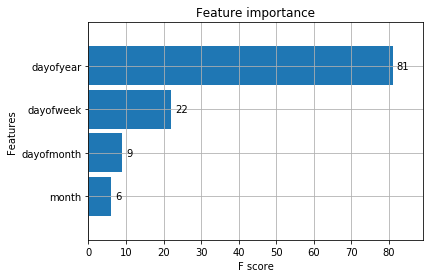

In [115]:
from xgboost import plot_importance, plot_tree

_ = plot_importance(reg, height=0.9)

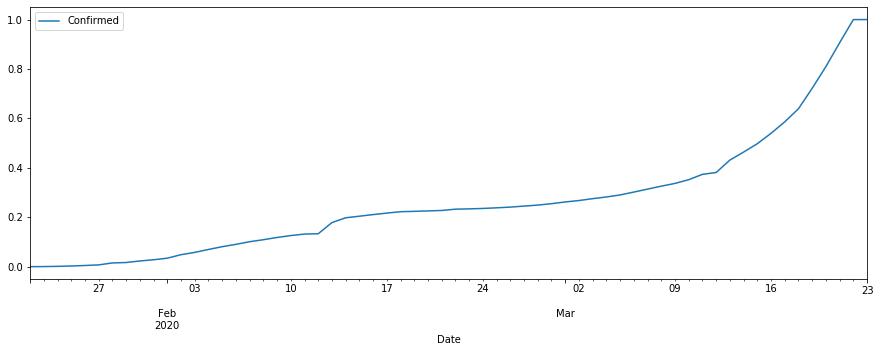

In [116]:
_ = df_covid_world[['Confirmed']].plot(figsize=(15, 5))


In [100]:
X_valid

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2020-03-21,0,5,1,3,2020,81,21,12
2020-03-22,0,6,1,3,2020,82,22,12
2020-03-23,0,0,1,3,2020,83,23,13


In [101]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,
2020-03-16,0,0,1,3,2020,76,16,12
2020-03-17,0,1,1,3,2020,77,17,12
2020-03-18,0,2,1,3,2020,78,18,12
2020-03-19,0,3,1,3,2020,79,19,12
2020-03-20,0,4,1,3,2020,80,20,12
2020-03-21,0,5,1,3,2020,81,21,12
2020-03-22,0,6,1,3,2020,82,22,12
2020-03-23,0,0,1,3,2020,83,23,13


In [117]:
covid_valid['Prediction'] = reg.predict(X_valid)
covid_all = pd.concat([covid_valid, covid_train], sort=False).sort_index()

In [118]:
covid_all

,Confirmed,Deaths,Recovered,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Prediction
Date,,,,,,,,,,,,,
2020-01-22,0.000000,0.0,0.0,2020-01-22,0,2,1,1,2020,22,22,4,NaN
2020-01-23,0.000000,0.0,0.0,2020-01-23,0,3,1,1,2020,23,23,4,NaN
2020-01-24,0.000030,0.0,0.0,2020-01-24,0,4,1,1,2020,24,24,4,NaN
2020-01-25,0.000030,0.0,0.0,2020-01-25,0,5,1,1,2020,25,25,4,NaN
2020-01-26,0.000120,0.0,0.0,2020-01-26,0,6,1,1,2020,26,26,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-19,0.410987,200.0,0.0,2020-03-19,0,3,1,3,2020,79,19,12,NaN
2020-03-20,0.573957,244.0,0.0,2020-03-20,0,4,1,3,2020,80,20,12,NaN
2020-03-21,0.765957,307.0,0.0,2020-03-21,0,5,1,3,2020,81,21,12,0.572847


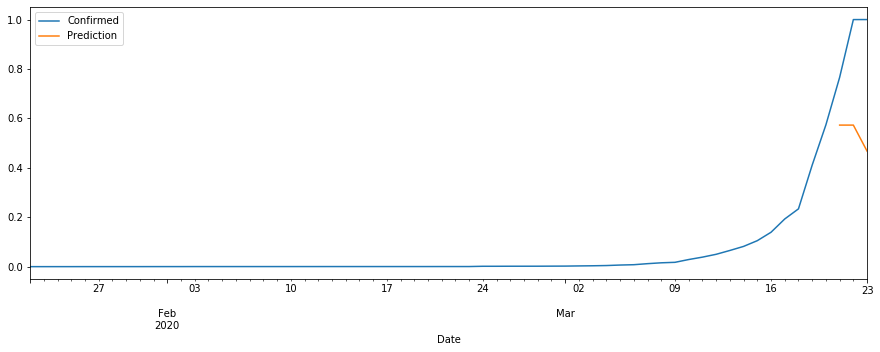

In [119]:
_ = covid_all[['Confirmed','Prediction']].plot(figsize=(15, 5))